In [18]:
%load_ext autotime

# An incremental evaluation function and a testsuite for computer chess

This article is a continuation of the post
https://medium.com/@andreasstckl/writing-a-chess-program-in-one-day-30daff4610ec

It shows how to write a simple computer chess program with only a few lines of code in Python, and contains all main parts of a chess engine. In this article and future postings I will show how to enhance the program. 

The code can be found at:
https://github.com/astoeckl/mediumchess/

The simple program in the previous post has a very simple evaluation function, but evaluation and therefore the whole search process is very slow because each node in the search is evaluated from scratch. In the search process the positions only differ by one move, and so it is a good idea to initialize the evaluation at the begin of the search and then incrementally update the evalutation after each move. 

In [1]:
import chess
import chess.svg
from IPython.display import SVG

## Incremental evaluation

I define a function to evaluate the actual position and store the value in a global variable. This funcion is called once at the beginning of a search.

In [2]:
def init_evaluate_board():
    global boardvalue
    
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))
    
    material = 100*(wp-bp)+320*(wn-bn)+330*(wb-bb)+500*(wr-br)+900*(wq-bq)
    
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq= pawnsq + sum([-pawntable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq= sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq= bishopsq + sum([-bishopstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) 
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) 
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) 
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)] 
                                    for i in board.pieces(chess.KING, chess.BLACK)])
    
    boardvalue = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    
    return boardvalue

The evaluation function now simply checks for mate or draw and reads the board value from the global variable.

In [13]:
def evaluate_board():
    
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0
    
    eval = boardvalue
    if board.turn:
        return eval
    else:
        return -eval

The definition of the piece square tables remains unchanged.

In [14]:
pawntable = [
 0,  0,  0,  0,  0,  0,  0,  0,
 5, 10, 10,-20,-20, 10, 10,  5,
 5, -5,-10,  0,  0,-10, -5,  5,
 0,  0,  0, 20, 20,  0,  0,  0,
 5,  5, 10, 25, 25, 10,  5,  5,
10, 10, 20, 30, 30, 20, 10, 10,
50, 50, 50, 50, 50, 50, 50, 50,
 0,  0,  0,  0,  0,  0,  0,  0]

knightstable = [
-50,-40,-30,-30,-30,-30,-40,-50,
-40,-20,  0,  5,  5,  0,-20,-40,
-30,  5, 10, 15, 15, 10,  5,-30,
-30,  0, 15, 20, 20, 15,  0,-30,
-30,  5, 15, 20, 20, 15,  5,-30,
-30,  0, 10, 15, 15, 10,  0,-30,
-40,-20,  0,  0,  0,  0,-20,-40,
-50,-40,-30,-30,-30,-30,-40,-50]

bishopstable = [
-20,-10,-10,-10,-10,-10,-10,-20,
-10,  5,  0,  0,  0,  0,  5,-10,
-10, 10, 10, 10, 10, 10, 10,-10,
-10,  0, 10, 10, 10, 10,  0,-10,
-10,  5,  5, 10, 10,  5,  5,-10,
-10,  0,  5, 10, 10,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10,-10,-10,-10,-10,-20]

rookstable = [
  0,  0,  0,  5,  5,  0,  0,  0,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
  5, 10, 10, 10, 10, 10, 10,  5,
 0,  0,  0,  0,  0,  0,  0,  0]

queenstable = [
-20,-10,-10, -5, -5,-10,-10,-20,
-10,  0,  0,  0,  0,  0,  0,-10,
-10,  5,  5,  5,  5,  5,  0,-10,
  0,  0,  5,  5,  5,  5,  0, -5,
 -5,  0,  5,  5,  5,  5,  0, -5,
-10,  0,  5,  5,  5,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10, -5, -5,-10,-10,-20]

kingstable = [
 20, 30, 10,  0,  0, 10, 30, 20,
 20, 20,  0,  0,  0,  0, 20, 20,
-10,-20,-20,-20,-20,-20,-20,-10,
-20,-30,-30,-40,-40,-30,-30,-20,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30]

Now I have to define a function to update the global boardvalue after each move and after a move has takten back during search.

In [28]:
piecetypes = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING ]
tables = [pawntable, knightstable, bishopstable, rookstable, queenstable, kingstable]
piecevalues = [100,320,330,500,900]

def update_eval(mov, side):
    global boardvalue
    
    #update piecequares
    movingpiece = board.piece_type_at(mov.from_square)
    if side:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.from_square]
        #update castling
        if (mov.from_square == chess.E1) and (mov.to_square == chess.G1):
            boardvalue = boardvalue - rookstable[chess.H1]
            boardvalue = boardvalue + rookstable[chess.F1]
        elif (mov.from_square == chess.E1) and (mov.to_square == chess.C1):
            boardvalue = boardvalue - rookstable[chess.A1]
            boardvalue = boardvalue + rookstable[chess.D1]
    else:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.from_square]
        #update castling
        if (mov.from_square == chess.E8) and (mov.to_square == chess.G8):
            boardvalue = boardvalue + rookstable[chess.H8]
            boardvalue = boardvalue - rookstable[chess.F8]
        elif (mov.from_square == chess.E8) and (mov.to_square == chess.C8):
            boardvalue = boardvalue + rookstable[chess.A8]
            boardvalue = boardvalue - rookstable[chess.D8]
        
    if side:
        boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square]
    else:
        boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square]
        
     
    #update material
    if mov.drop != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.drop-1]
        else:
            boardvalue = boardvalue - piecevalues[mov.drop-1]
            
    #update promotion
    if mov.promotion != None:
        if side:
            boardvalue = boardvalue + piecevalues[mov.promotion-1] - piecevalues[movingpiece-1]
            boardvalue = boardvalue - tables[movingpiece - 1][mov.to_square] \
                + tables[mov.promotion - 1][mov.to_square]
        else:
            boardvalue = boardvalue - piecevalues[mov.promotion-1] + piecevalues[movingpiece-1]
            boardvalue = boardvalue + tables[movingpiece - 1][mov.to_square] \
                - tables[mov.promotion - 1][mov.to_square]
            
            
    return mov

def make_move(mov):
    update_eval(mov, board.turn)
    board.push(mov)
    
    return mov

def unmake_move():
    mov = board.pop()
    update_eval(mov, not board.turn)
    
    return mov

time: 155 ms


The functions make_move(mov) and unmake_move() are used insted of using board.push(mov) board.pop() directly. The search function are modified with this functions.

In [16]:
def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            make_move(move)        
            score = -quiesce( -beta, -alpha )
            unmake_move()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score  
    return alpha

def alphabeta( alpha, beta, depthleft ):
    bestscore = -9999
    if( depthleft == 0 ):
        return quiesce( alpha, beta )
    for move in board.legal_moves:
        make_move(move)   
        score = -alphabeta( -beta, -alpha, depthleft - 1 )
        unmake_move()
        if( score >= beta ):
            return score
        if( score > bestscore ):
            bestscore = score
        if( score > alpha ):
            alpha = score   
    return bestscore

import chess.polyglot

def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("bookfish.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            make_move(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            unmake_move()
        movehistory.append(bestMove)
        return bestMove

Testing the search on a middle game postion with the new evaluation shows faster search process with about 2 Min for a search with depth 5. With the old version the same search took more the an half hour.

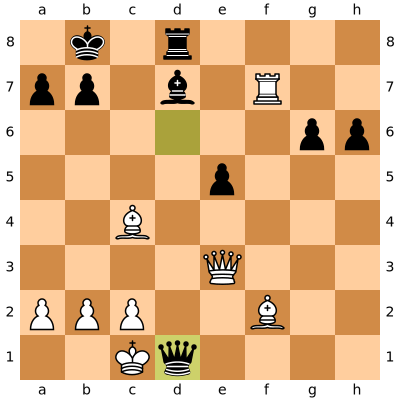

time: 2min 8s


In [19]:
movehistory =[]
board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
boardvalue = init_evaluate_board()

mov = selectmove(5)
make_move(mov)
SVG(chess.svg.board(board=board,size=400,lastmove=mov))

## A suite of testpostions

I want to use a set of positions which is good for testing the ability of a chess engine to solve tactical positions and so is able to test the quality of the search. A collection of such problems is the Bratko-Kopec Test (https://www.chessprogramming.org/Bratko-Kopec_Test) from the 80s. This test has been a standard for nearly 20 years in computer chess and in our days it is good to test a weak engine like mine.

The position I used for the speed test above is position 1 from this set.

I import the 24 postions in [FEN](https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation) notation.

In [20]:
positions = [
"1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1",
"3r1k2/4npp1/1ppr3p/p6P/P2PPPP1/1NR5/5K2/2R5 w - - 0 1",
"2q1rr1k/3bbnnp/p2p1pp1/2pPp3/PpP1P1P1/1P2BNNP/2BQ1PRK/7R b - - 0 1",
"rnbqkb1r/p3pppp/1p6/2ppP3/3N4/2P5/PPP1QPPP/R1B1KB1R w KQkq - 0 1",
"r1b2rk1/2q1b1pp/p2ppn2/1p6/3QP3/1BN1B3/PPP3PP/R4RK1 w - - 0 1",
"2r3k1/pppR1pp1/4p3/4P1P1/5P2/1P4K1/P1P5/8 w - - 0 1",
"1nk1r1r1/pp2n1pp/4p3/q2pPp1N/b1pP1P2/B1P2R2/2P1B1PP/R2Q2K1 w - - 0 1",
"4b3/p3kp2/6p1/3pP2p/2pP1P2/4K1P1/P3N2P/8 w - - 0 1",
"2kr1bnr/pbpq4/2n1pp2/3p3p/3P1P1B/2N2N1Q/PPP3PP/2KR1B1R w - - 0 1",
"3rr1k1/pp3pp1/1qn2np1/8/3p4/PP1R1P2/2P1NQPP/R1B3K1 b - - 0 1",
"2r1nrk1/p2q1ppp/bp1p4/n1pPp3/P1P1P3/2PBB1N1/4QPPP/R4RK1 w - - 0 1",
"r3r1k1/ppqb1ppp/8/4p1NQ/8/2P5/PP3PPP/R3R1K1 b - - 0 1",
"r2q1rk1/4bppp/p2p4/2pP4/3pP3/3Q4/PP1B1PPP/R3R1K1 w - - 0 1",
"rnb2r1k/pp2p2p/2pp2p1/q2P1p2/8/1Pb2NP1/PB2PPBP/R2Q1RK1 w - - 0 1",
"2r3k1/1p2q1pp/2b1pr2/p1pp4/6Q1/1P1PP1R1/P1PN2PP/5RK1 w - - 0 1",
"r1bqkb1r/4npp1/p1p4p/1p1pP1B1/8/1B6/PPPN1PPP/R2Q1RK1 w kq - 0 1",
"r2q1rk1/1ppnbppp/p2p1nb1/3Pp3/2P1P1P1/2N2N1P/PPB1QP2/R1B2RK1 b - - 0 1",
"r1bq1rk1/pp2ppbp/2np2p1/2n5/P3PP2/N1P2N2/1PB3PP/R1B1QRK1 b - - 0 1",
"3rr3/2pq2pk/p2p1pnp/8/2QBPP2/1P6/P5PP/4RRK1 b - - 0 1",
"r4k2/pb2bp1r/1p1qp2p/3pNp2/3P1P2/2N3P1/PPP1Q2P/2KRR3 w - - 0 1",
"3rn2k/ppb2rpp/2ppqp2/5N2/2P1P3/1P5Q/PB3PPP/3RR1K1 w - - 0 1",
"2r2rk1/1bqnbpp1/1p1ppn1p/pP6/N1P1P3/P2B1N1P/1B2QPP1/R2R2K1 b - - 0 1",
"r1bqk2r/pp2bppp/2p5/3pP3/P2Q1P2/2N1B3/1PP3PP/R4RK1 b kq - 0 1",
"r2qnrnk/p2b2b1/1p1p2pp/2pPpp2/1PP1P3/PRNBB3/3QNPPP/5RK1 w - - 0 1",
]
solutions = ["Qd1+","d5","f5","e6","a4","g6","Nf6","f5","f5","Ne5","f4","Bf5","b4",
             "Qd2 Qe1","Qxg7+","Ne4","h5","Nb3","Rxe4","g4","Nh6","Bxe4","f6","f4"]

time: 6 ms


We can compute the search for each position and compare with the solution. For example position 9.

d5
d5


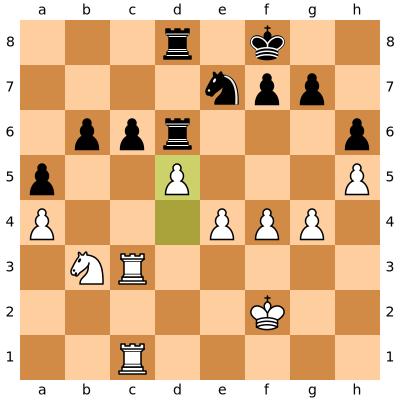

time: 2min 50s


In [21]:
movehistory =[]
board = chess.Board(positions[1])
boardvalue = init_evaluate_board()

mov = selectmove(6)
print(solutions[1])
print(board.san(mov))

make_move(mov)
SVG(chess.svg.board(board=board,size=400,lastmove=mov))

Now I loop over all positions and count the number of correct solutions for different search depth.

In [24]:
depth = 5
solved = 0
for i in range(24):
    movehistory =[]
    board = chess.Board(positions[i])
    boardvalue = init_evaluate_board()

    mov = selectmove(depth)
    print("Move problem " + str(i+1) + " " + board.san(mov) + " / Solution: " + solutions[i])

    if str(board.san(mov)) in str(solutions[i]):
        solved = solved + 1
        print("OK")
    else:
        print("wrong")

print("Number of correct solved: " + str(solved))

Move problem 0 Qd1+ / Solution: Qd1+
OK
Move problem 1 d5 / Solution: d5
OK
Move problem 2 Kg8 / Solution: f5
wrong
Move problem 3 a4 / Solution: e6
wrong
Move problem 4 a4 / Solution: a4
OK
Move problem 5 g6 / Solution: g6
OK
Move problem 6 g4 / Solution: Nf6
wrong
Move problem 7 Kf2 / Solution: f5
wrong
Move problem 8 Kb1 / Solution: f5
wrong
Move problem 9 Re7 / Solution: Ne5
wrong
Move problem 10 f4 / Solution: f4
OK
Move problem 11 Red8 / Solution: Bf5
wrong
Move problem 12 Bc3 / Solution: b4
wrong
Move problem 13 a4 / Solution: Qd2 Qe1
wrong
Move problem 14 a4 / Solution: Qxg7+
wrong
Move problem 15 a4 / Solution: Ne4
wrong
Move problem 16 Nc5 / Solution: h5
wrong
Move problem 17 Kh8 / Solution: Nb3
wrong
Move problem 18 Rh8 / Solution: Rxe4
wrong
Move problem 19 g4 / Solution: g4
OK
Move problem 20 a4 / Solution: Nh6
wrong
Move problem 21 Kh8 / Solution: Bxe4
wrong
Move problem 22 Rg8 / Solution: f6
wrong
Move problem 23 f4 / Solution: f4
OK
Number of correct solved: 7
time: 29m

For a search depth of 3 it solves 4 positions in 15 sec.

For a search depth of 4 it solves 5 positions in 2 min 14 sec.

For a search depth of 5 it solves 7 positions in 29 min 12 sec.

The program is now able to solve some of the 24 test positions in several minutes. In the next articles I will try to improve the speed and so the quality of the search.